In [28]:
using CSV
using DataFrames
using Plots
using StatsBase
using StatsPlots
using Pkg
using Plots.Measures
using Statistics

In [2]:
ENV["GKS_ENCODING"]="utf8"
pyplot()

Plots.PyPlotBackend()

In [3]:
cd("/home/fcharih/Projects/PhD/peptide_screening/")

In [4]:
targets_df = DataFrame(
	CSV.File("data/peptide_subset.csv")
)[!, [:compound_name, :targets]]

,compound_name,targets
,String,String
1,corticotropin,Q01726;Q01718;P41968;P32245;P33032
2,calcitonin_salmon,P30988
3,tetracosactide,Q01718
4,calcitonin_human,Q16602
5,carperitide,P16066;P20594;P17342
6,bivalirudin,P00734
7,nesiritide,P16066;P20594;P17342
8,pramlintide,Q16602
9,exenatide,P43220


In [5]:
targets = Dict()
for row in eachrow(targets_df)
	targets[row["compound_name"]] = split(row["targets"], ";")
end
targets

Dict{Any, Any} with 14 entries:
  "tetracosactide"    => SubString{String}["Q01718"]
  "liraglutide"       => SubString{String}["P43220"]
  "albiglutide"       => SubString{String}["P43220"]
  "corticotropin"     => SubString{String}["Q01726", "Q01718", "P41968", "P3224…
  "tesamorelin"       => SubString{String}["Q02643"]
  "exenatide"         => SubString{String}["P43220"]
  "lixisenatide"      => SubString{String}["P43220"]
  "calcitonin_human"  => SubString{String}["Q16602"]
  "pramlintide"       => SubString{String}["Q16602"]
  "teduglutide"       => SubString{String}["O95838"]
  "bivalirudin"       => SubString{String}["P00734"]
  "calcitonin_salmon" => SubString{String}["P30988"]
  "carperitide"       => SubString{String}["P16066", "P20594", "P17342"]
  "nesiritide"        => SubString{String}["P16066", "P20594", "P17342"]

In [6]:
pipr_minus = DataFrame(CSV.File("data/predictions/predictions_minus_160621_pipr.tsv", delim=" ", header=["peptide", "protein", "score"]))
pipr_plus = DataFrame(CSV.File("data/predictions/predictions_plus_160621_pipr.tsv", delim=" ", header=["peptide", "protein", "score"]))
sprint_minus = DataFrame(CSV.File("data/predictions/predictions_minus_old_sprint.tsv", delim=" ", header=["peptide", "protein","score"]))				
sprint_plus = DataFrame(CSV.File("data/predictions/predictions_plus_160621_sprint.tsv", delim=" ", header=["peptide", "protein", "score"]))
dscript = DataFrame(CSV.File("data/predictions/dscript_base_predictions.tsv", delim=" ", header=["peptide", "protein", "score"]))

,peptide,protein,score
,String,String,Float64
1,corticotropin,P31946,0.00429997
2,corticotropin,P62258,0.00564836
3,corticotropin,Q04917,0.00789873
4,corticotropin,P61981,0.00422548
5,corticotropin,P31947,0.00418336
6,corticotropin,P27348,0.00462684
7,corticotropin,P63104,0.00426372
8,corticotropin,Q96QU6,0.00417636
9,corticotropin,Q4AC99,0.00417609


In [7]:
function plot_curve(dataframe, peptide, method, targets)
	peptide_df = filter(x -> x.peptide == peptide && x.score_function == method, dataframe)
	sort!(peptide_df, :score, rev=true)
	peptide_df["rank"] = 1:nrow(peptide_df)
	
	targets_df = filter(x -> x.protein ∈ targets[peptide], peptide_df)
	
	o2a = scatter(peptide_df.rank, peptide_df.score, framestyle=:box, legend=false, xlabel="Rank", ylabel="Score")
	scatter!(targets_df.rank, targets_df.score, color=:red, marker=8, formatter=:plain)
	
	
	o2a
end

plot_curve (generic function with 1 method)

In [8]:
scores = vcat(
	select(pipr_minus, :, :score => ByRow(x -> "pipr_minus")),
	select(pipr_plus, :, :score => ByRow(x -> "pipr_plus")),
	select(sprint_minus, :, :score => ByRow(x -> "sprint_minus")),
	select(sprint_plus, :, :score => ByRow(x -> "sprint_plus")),
	select(dscript, :, :score => ByRow(x -> "dscript")),
)

,peptide,protein,score,score_function
,String,String,Float64,String
1,corticotropin,P31946,0.255421,pipr_minus
2,corticotropin,P62258,0.952451,pipr_minus
3,corticotropin,Q04917,0.017549,pipr_minus
4,corticotropin,P61981,0.49676,pipr_minus
5,corticotropin,P31947,0.046534,pipr_minus
6,corticotropin,P27348,0.020812,pipr_minus
7,corticotropin,P63104,0.394225,pipr_minus
8,corticotropin,Q96QU6,0.266344,pipr_minus
9,corticotropin,Q4AC99,0.002884,pipr_minus


In [9]:
surface_proteins = Set(readlines("data/surfaceome.txt"))
scores_surface = filter(row -> (row.protein ∈ surface_proteins) || (row.protein ∈ targets[row.peptide]), scores)
filter!(x -> x.peptide != "albiglutide", scores_surface)

,peptide,protein,score,score_function
,String,String,Float64,String
1,corticotropin,P08195,0.374609,pipr_minus
2,corticotropin,P08908,0.064412,pipr_minus
3,corticotropin,P28222,0.573062,pipr_minus
4,corticotropin,P28221,0.008593,pipr_minus
5,corticotropin,P28566,0.766317,pipr_minus
6,corticotropin,P30939,0.102829,pipr_minus
7,corticotropin,P28223,0.05027,pipr_minus
8,corticotropin,P41595,0.003923,pipr_minus
9,corticotropin,P28335,0.641837,pipr_minus


In [10]:
methods2 = ["dscript", "pipr_plus", "pipr_minus", "sprint_plus", "sprint_minus"]
data2 = []
for (peptide, peptide_targets) in targets
    for method in methods2
        # Assign ranks
        sub = filter(x -> x.peptide == peptide && x.score_function == method, scores_surface)
        sub["rank"] = competerank(sub[!, :score], rev = true)
        for target in peptide_targets

            selection = sub[sub.protein .== target, :]
            named_tup = Tables.rowtable(selection)
            push!(data2, named_tup)
        end
    end
end

In [11]:
df3 = DataFrame(peptide=[], protein=[], score=[], score_function=[], rank=[])
for ele in data2

    if length(ele) == 0
        println("SKIP")
        continue
    end

    element = ele[1]

    push!(df3, [element.peptide, element.protein, element.score, element.score_function, element.rank])

end

SKIP
SKIP
SKIP
SKIP
SKIP


In [12]:
df3

,peptide,protein,score,score_function,rank
,Any,Any,Any,Any,Any
1,tetracosactide,Q01718,0.00419938,dscript,1536
2,tetracosactide,Q01718,1.0,pipr_plus,1
3,tetracosactide,Q01718,0.0019,pipr_minus,2347
4,tetracosactide,Q01718,21.7608,sprint_plus,5
5,tetracosactide,Q01718,0.0103816,sprint_minus,898
6,liraglutide,P43220,0.00420904,dscript,1330
7,liraglutide,P43220,1.0e-6,pipr_plus,1408
8,liraglutide,P43220,0.106423,pipr_minus,779
9,liraglutide,P43220,96.3103,sprint_plus,1


In [13]:
ranking_matrix = vcat([
	df3[df3.score_function .== method, :]["rank"]
	for method in methods2
])

5-element Vector{Vector{Any}}:
 [1536, 1330, 999, 1306, 1161, 1313, 1336, 2623, 1235, 1085  …  631, 1037, 2091, 2519, 101, 89, 1936, 1958, 1705, 1908]
 [1, 1408, 1805, 1, 2464, 2742, 1766, 362, 948, 629  …  786, 843, 416, 1589, 117, 226, 1827, 66, 306, 2097]
 [2347, 779, 1383, 1016, 727, 1098, 457, 2101, 491, 500  …  124, 1185, 2701, 1132, 2010, 517, 2493, 906, 1742, 2624]
 [5, 1, 4, 5, 3, 1, 2, 1866, 1, 1  …  926, 4, 2034, 1731, 3, 1, 2, 3, 1, 2]
 [898, 2011, 1405, 1390, 2327, 259, 1530, 2243, 1989, 1653  …  793, 1646, 53, 1235, 3, 2, 1, 3, 2, 1]

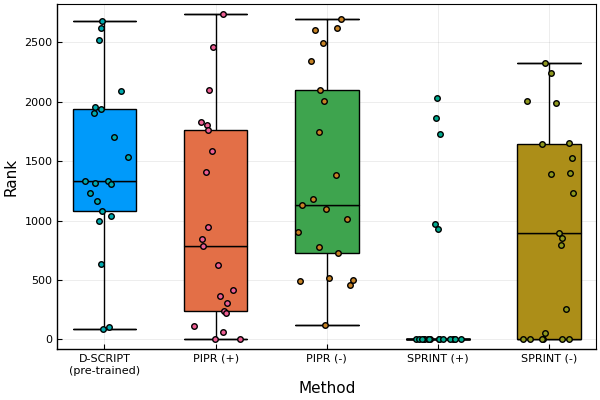

In [14]:
labels = ["D-SCRIPT\n(pre-trained)" "PIPR (+)" "PIPR (-)" "SPRINT (+)" "SPRINT (-)" ]
box_plot_surface = boxplot(labels, ranking_matrix, leg = false, framestyle=:box, outliers=false, formatter=:plain, xlabel="Method", ylabel="Rank")
dotplot!(labels, ranking_matrix)

In [15]:
savefig(box_plot_surface, "figures/surface_proteins_boxplot.pdf")

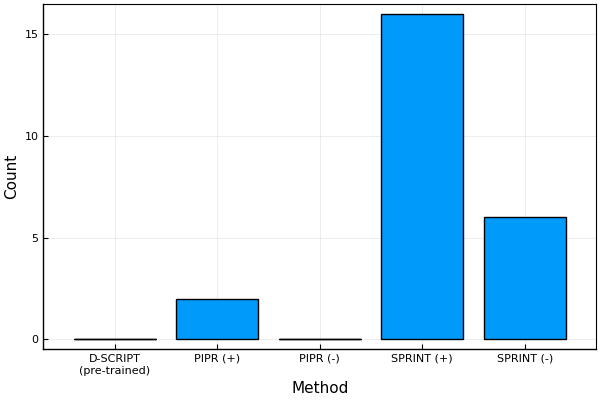

In [16]:
num_in_top20 = Dict()
for method in methods2
    num_in_top20[method] = nrow(filter(x -> x.rank <= 20 && x.score_function == method, df3))
end
barchart = bar(["D-SCRIPT\n(pre-trained)", "PIPR (+)", "PIPR (-)", "SPRINT (+)", "SPRINT (-)"], [num_in_top20[m] for m in methods2], legend=false, framestyle=:box, xlabel="Method", ylabel="Count")

In [17]:
savefig(barchart, "figures/top20.pdf")

In [18]:
df3[df3.score_function .== "sprint_plus", :]

,peptide,protein,score,score_function,rank
,Any,Any,Any,Any,Any
1,tetracosactide,Q01718,21.7608,sprint_plus,5
2,liraglutide,P43220,96.3103,sprint_plus,1
3,corticotropin,Q01726,35.7007,sprint_plus,4
4,corticotropin,Q01718,34.1636,sprint_plus,5
5,corticotropin,P41968,50.5901,sprint_plus,3
6,corticotropin,P32245,125.383,sprint_plus,1
7,corticotropin,P33032,53.8685,sprint_plus,2
8,tesamorelin,Q02643,0.560552,sprint_plus,1866
9,exenatide,P43220,102.884,sprint_plus,1


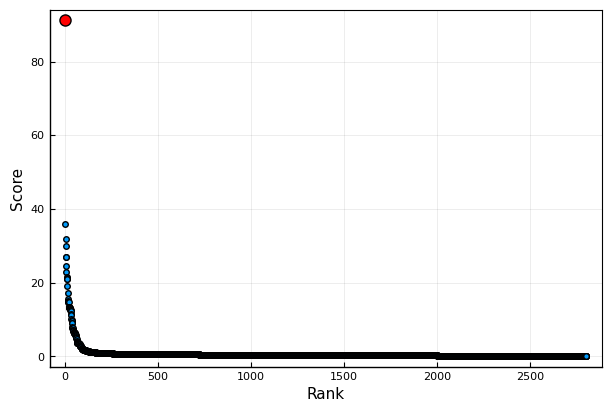

In [19]:
c = plot_curve(scores_surface, "lixisenatide", "sprint_plus", targets)
savefig("figures/lixisenatide_o2a_surface.pdf")

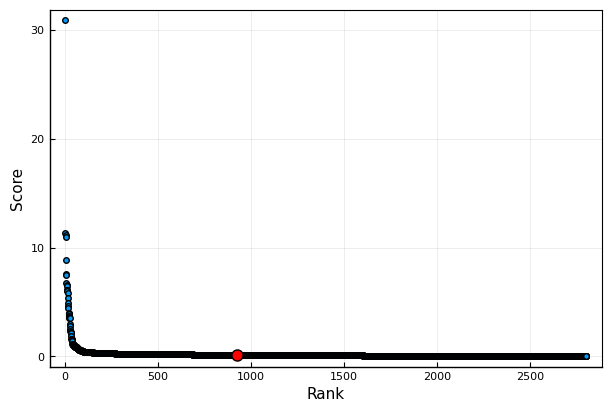

In [20]:
plot_curve(scores_surface, "pramlintide", "sprint_plus", targets)
savefig("figures/pramlintide_o2a_surface.pdf")

In [33]:
println("==Median rank==")
for method in methods2
    med = median(df3[df3.score_function .== method, :].rank)
    println("$method => $med")
end

==Median rank==
dscript => 1330.0
pipr_plus => 786.0
pipr_minus => 1132.0
sprint_plus => 3.0
sprint_minus => 898.0


In [35]:
println("==Best rank==")
for method in methods2
    med = minimum(df3[df3.score_function .== method, :].rank)
    println("$method => $med")
end

==Best rank==
dscript => 89
pipr_plus => 1
pipr_minus => 124
sprint_plus => 1
sprint_minus => 1


In [36]:
df3[df3.score_function .== "pipr_plus", :]

,peptide,protein,score,score_function,rank
,Any,Any,Any,Any,Any
1,tetracosactide,Q01718,1.0,pipr_plus,1
2,liraglutide,P43220,1.0e-6,pipr_plus,1408
3,corticotropin,Q01726,0.029357,pipr_plus,1805
4,corticotropin,Q01718,1.0,pipr_plus,1
5,corticotropin,P41968,5.0e-5,pipr_plus,2464
6,corticotropin,P32245,0.0,pipr_plus,2742
7,corticotropin,P33032,0.038559,pipr_plus,1766
8,tesamorelin,Q02643,0.143933,pipr_plus,362
9,exenatide,P43220,2.0e-6,pipr_plus,948


## Plotting all the O2A curves

In [10]:
using CSV
using DataFrames
using Plots
using Plots.Measures
pyplot()

Plots.PyPlotBackend()

In [21]:
plot_methods = Dict(
    "pipr_minus" => "data/predictions/predictions_minus_160621_pipr.tsv",
    "pipr_plus" => "data/predictions/predictions_plus_160621_pipr.tsv",
    "sprint_minus" => "data/predictions/predictions_minus_old_sprint.tsv",			
    "sprint_plus" => "data/predictions/predictions_plus_160621_sprint.tsv", 
    "dscript" => "data/predictions/dscript_base_predictions.tsv"
)

Dict{String, String} with 5 entries:
  "pipr_minus"   => "data/predictions/predictions_minus_160621_pipr.tsv"
  "sprint_minus" => "data/predictions/predictions_minus_old_sprint.tsv"
  "sprint_plus"  => "data/predictions/predictions_plus_160621_sprint.tsv"
  "pipr_plus"    => "data/predictions/predictions_plus_160621_pipr.tsv"
  "dscript"      => "data/predictions/dscript_base_predictions.tsv"

Loading the peptide data...
Generating the O2A curves...
Plotting the curves...
Generating the O2A curves...
Plotting the curves...
Generating the O2A curves...
Plotting the curves...
Generating the O2A curves...
Plotting the curves...
Generating the O2A curves...


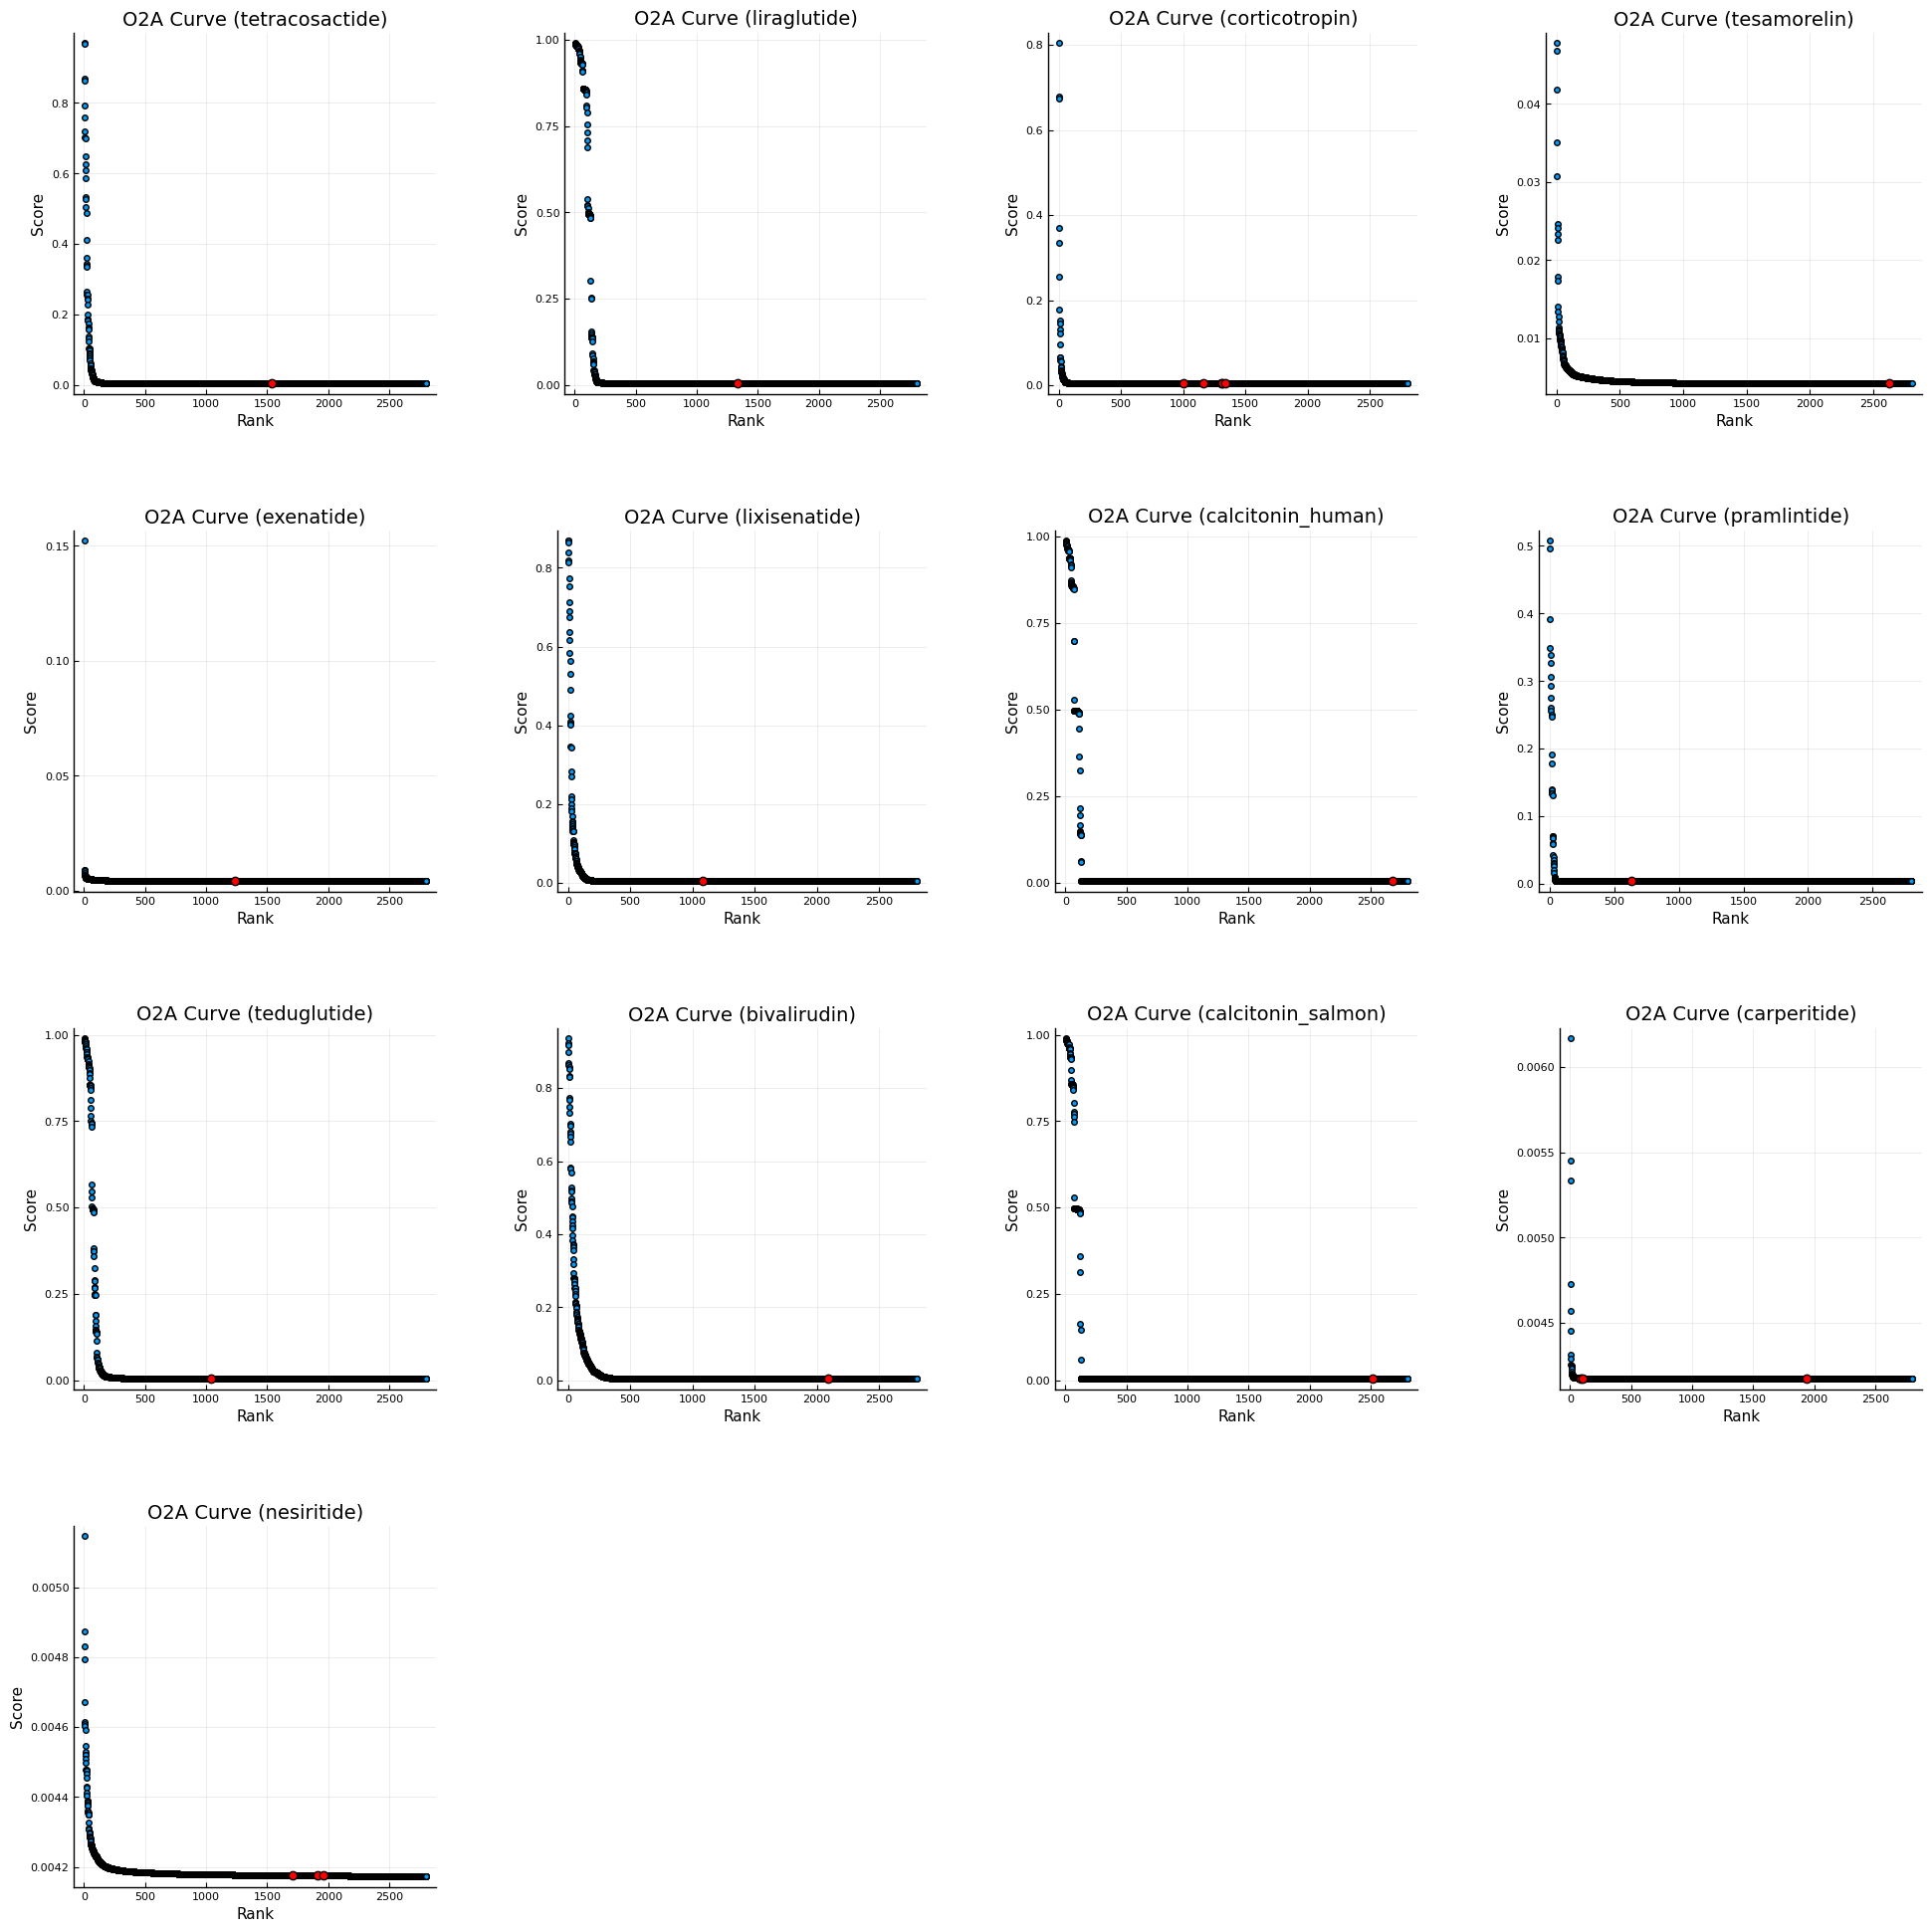

Plotting the curves...


In [24]:
surface_proteins = Set(readlines("../data/surfaceome.txt"))

function load_peptide_targets(peptide_filepath::String)
	df = DataFrame(CSV.File(peptide_filepath))

	peptides = Dict{String, Array{String}}()
	for row in eachrow(df)
        
        if row["compound_name"] == "albiglutide"
            continue
        end
		peptides[row["compound_name"]] = split(row["targets"], ";")
	end

	peptides
end

function generate_curves(scores_filepath::String)
	df = DataFrame(CSV.File(scores_filepath, header=false, delim=" "))
	peptide_groups = groupby(df, :Column1)
	peptide_curves = Dict()
	for group in peptide_groups
		peptide = group[1,:]["Column1"]
		sorted = sort(group, :Column3, rev=true)
        sorted = filter(x -> x.Column2 ∈ surface_proteins || x.Column2 == "P00734", sorted)
		sorted[!, :rank] = 1:nrow(sorted)
		peptide_curves[peptide] = sorted[!,[:rank,:Column2,:Column3]]
	end
	peptide_curves
end

function plot_curve(peptide::String, curves::Dict{Any, Any}, targets::Dict{String, Array{String}})
	df = curves[peptide]
	non_targets = filter(x -> x["Column2"] ∉ targets[peptide], df)
	targets = filter(x -> x["Column2"] ∈ targets[peptide], df)
	scatter(
		non_targets[!, :rank],
		non_targets[!, :Column3],
	  	title="O2A Curve ($peptide)",
		label="Non-target(s)",
		xlabel="Rank", ylabel="Score",
        margin=0mm
       )
	scatter!(
		targets[!, :rank],
		targets[!, :Column3],
		markersize=6,
		color="red", label="Target(s)")
end

println("Loading the peptide data...")
targets = load_peptide_targets("../data/peptide_subset.csv")

for (method_name, filename) in plot_methods
    println("Generating the O2A curves...")
    curves = generate_curves("../$(filename)")

    println("Plotting the curves...")
    plots = [plot_curve(peptide, curves, targets) for peptide in keys(targets)]
    plot(plots..., layout = length(plots), legend = false, size = (2000,2000), margin=10mm, formatter=:plain)

    #println("Saving the plots to $(args["output"])...")
    savefig("../figures/o2a_curves/$(method_name).png")
end